In [119]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import random
import matplotlib.pyplot as plt

from tqdm import tqdm

In [120]:
class MyNeural(nn.Module):
    def __init__(self):
        super().__init__()

        # self.flat = nn.Flatten()
        self.dropout = nn.Dropout(0.25)
        self.layer1 = nn.Linear(3, 20)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(20, 30)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(30, 2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.dropout(x)
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x


In [121]:
model = MyNeural()

In [122]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [132]:
def convert_data(arr):
    return torch.Tensor(np.float32(np.array(arr)))

def make_data():
    arr = []
    for _ in range(3):
        arr.append(round(random.random() * 100) / 100)
    res = [0.0, 1.0]
    if arr[0] > 0.5 and arr[1] > 0.5 and arr[2] > 0.5:
        res = [1.0, 0.0]
    return [arr, res]

def make_dataset():
    dataset = []
    resset = []
    for _ in range(1000):
        data = make_data()
        dataset.append(data[0])
        resset.append(data[1])
    return [dataset, resset]

In [133]:
dataset = make_dataset()
tensor_x = convert_data(dataset[0])
tensor_y = convert_data(dataset[1])
tensor_dataset = TensorDataset(tensor_x, tensor_y)

dataloader = torch.utils.data.DataLoader(
    tensor_dataset, batch_size=16, shuffle=True,
    num_workers=1, drop_last=True
)

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 438.71it/s]


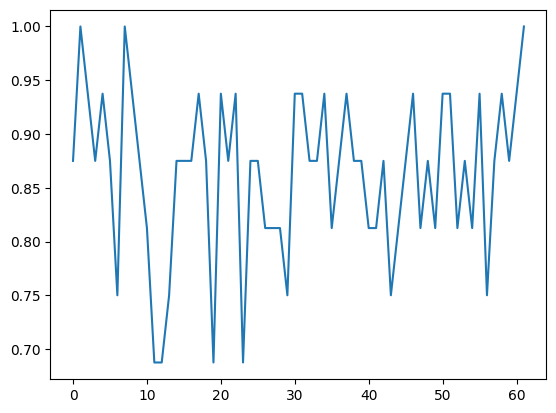

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 918.99it/s]


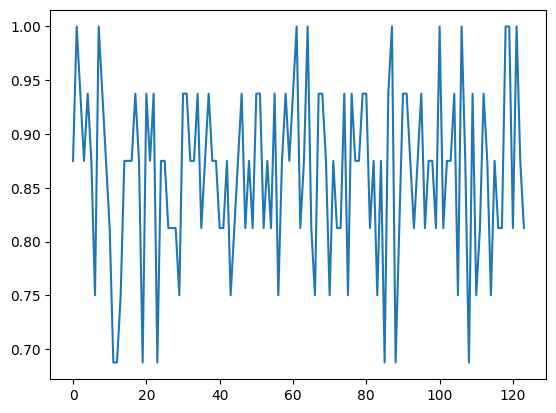

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 817.10it/s]


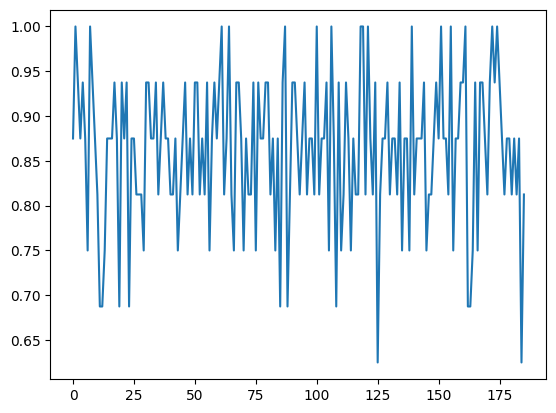

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 996.33it/s]


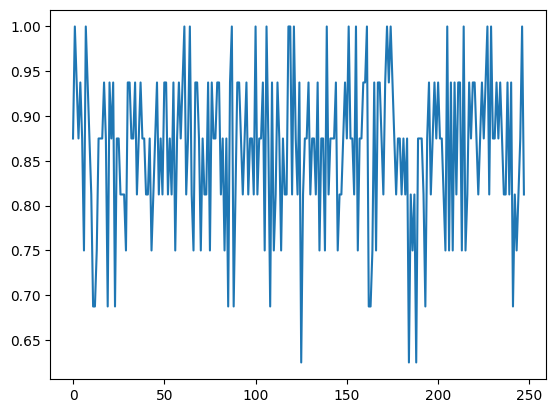

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 853.23it/s]


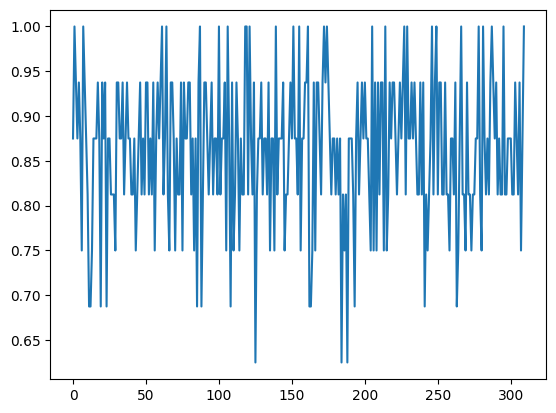

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 262.66it/s]


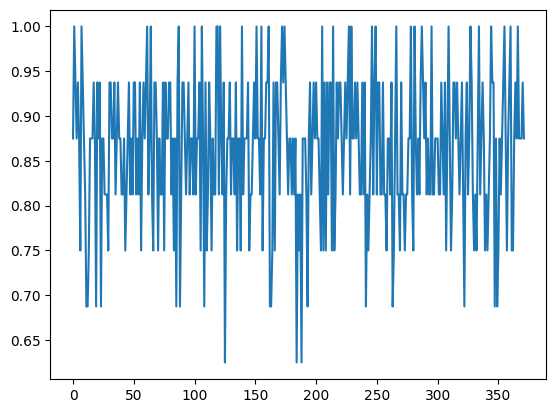

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 866.68it/s]


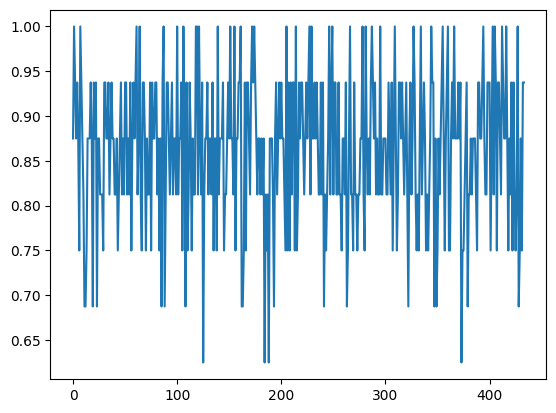

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 869.32it/s]


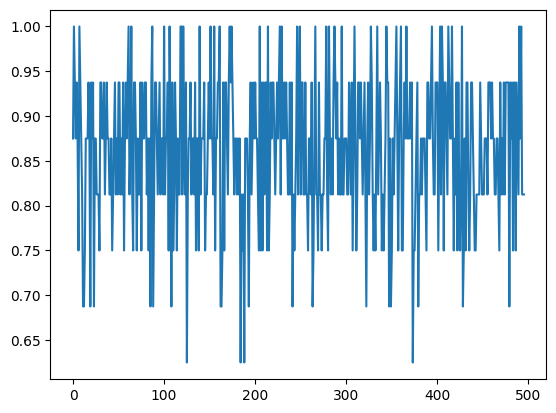

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 483.28it/s]


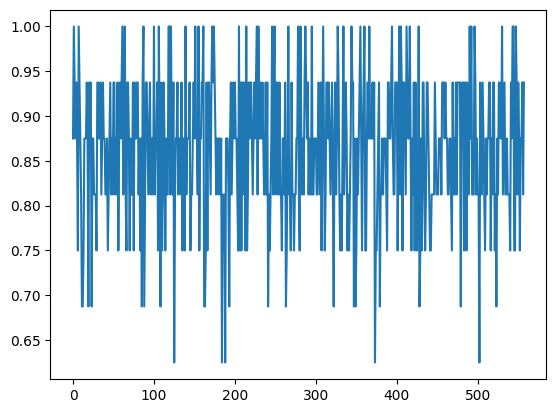

100%|██████████████████████████████████████████| 62/62 [00:00<00:00, 900.93it/s]


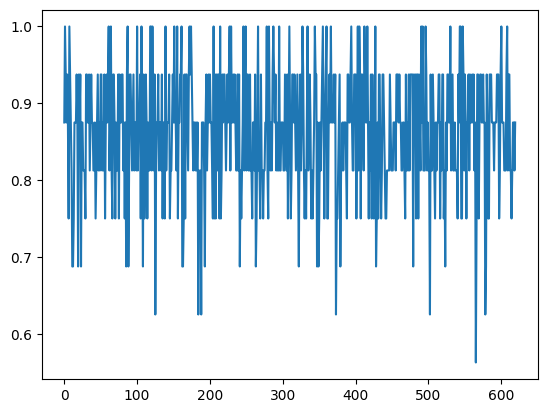

In [134]:
epochs = 10
ac = []

for _ in range(epochs):
    for data, res in (pbar := tqdm(dataloader)):
        optimizer.zero_grad()
    
        pred = model(data)
    
        loss = loss_fn(pred, res)
        loss.backward()
        optimizer.step()
            
        acc = (pred.round() == res).float().mean()
        ac.append(acc)
        
    plt.plot(ac)
    plt.show()


In [128]:
model(convert_data([0.1, 0.1, 0.1]))

tensor([0.4718, 0.5669], grad_fn=<SigmoidBackward0>)